# ERA5 monthly averaged data on single levels from 1940 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5 monthly averaged data on single levels from 1940 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit
import cartopy.crs as ccrs

## Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [2]:
soil_water = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-land-monthly-means',
    {
        "product_type": ["monthly_averaged_reanalysis"],
        "variable": [
            "volumetric_soil_water_layer_1"
        ],
        "year": ["2023"],
        "month": ["01"],
        "time": ["00:00"],
    },
)

## Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
style = earthkit.plots.styles.Style(
    colors="YlGnBu",
    levels=[i/10. for i in range(10)],
    units="m3 m-3",
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

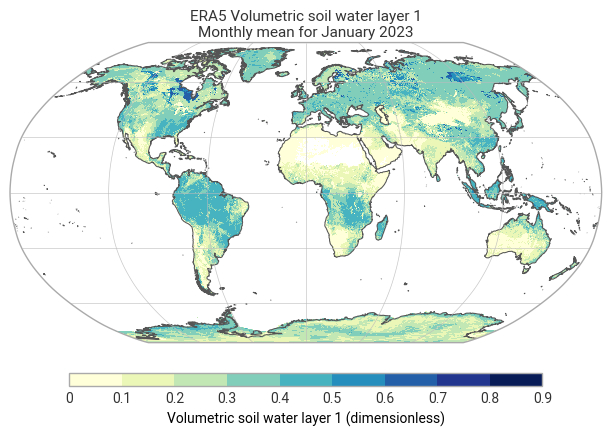

In [4]:
earthkit.plots.schema.figure.set(figsize=(6, 6))
crs = ccrs.Robinson()
chart = earthkit.plots.Map(crs=crs)

chart.pcolormesh(soil_water, style=style)
chart.coastlines()
chart.gridlines(draw_labels=False)

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-plots metadata
# detection, which allows us to use format keys like 'variable_name'
# and 'time', which are then populated from the metadata of the data
# that's been plotted.
chart.title(
    "ERA5 {variable_name}\n"
    "Monthly mean for {time:%B %Y}",
    fontsize=11,
)

chart.show()
# To save the figure, uncomment the line below, make sure you have write permissions
# in the current directory.
# chart.save("overview-detail.png")

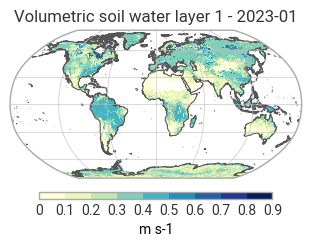

In [5]:
earthkit.plots.schema.figure.set(figsize = (3, 3))
chart = earthkit.plots.Map(crs=crs)

chart.pcolormesh(soil_water, style=style, transform_first=False)
chart.coastlines()
chart.gridlines(draw_labels=False)
chart.title("{variable_name} - {time:%Y-%m}")
chart.legend(label="m s-1")

chart.show()
# To save the figure, uncomment the line below, make sure you have write permissions
# in the current directory.
# chart.save("overview.png")